In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib  
import numpy as np
import time  

start_time = time.time()

train_df = pd.read_csv("preprocessed_train3.csv")
test_df = pd.read_csv("preprocessed_test3.csv")

target_column = 'baseFare'  

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTotal runtime: {elapsed_time:.2f} seconds")


Total runtime: 6.13 seconds


In [3]:
start_time = time.time()

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, 'rf_model2.pkl')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTotal runtime: {elapsed_time:.2f} seconds")


Total runtime: 1919.86 seconds


In [4]:
start_time = time.time()

rf = joblib.load('rf_model2.pkl')

X_test = X_test[X_train.columns]

# Prediction
y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = np.sqrt(mse)  # RMSE (raiz do MSE)
mae = mean_absolute_error(y_test, y_pred)  # MAE
r2 = r2_score(y_test, y_pred)  # R²

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTotal runtime: {elapsed_time:.2f} seconds")

MAE: 73.90354161893859
MSE: 11078.833017712212
RMSE: 105.25603554054376
R²: 0.49609608082685275

Total runtime: 57.45 seconds


C:\Users\Mats\AppData\Local\Temp\ipykernel_22000\3504143805.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


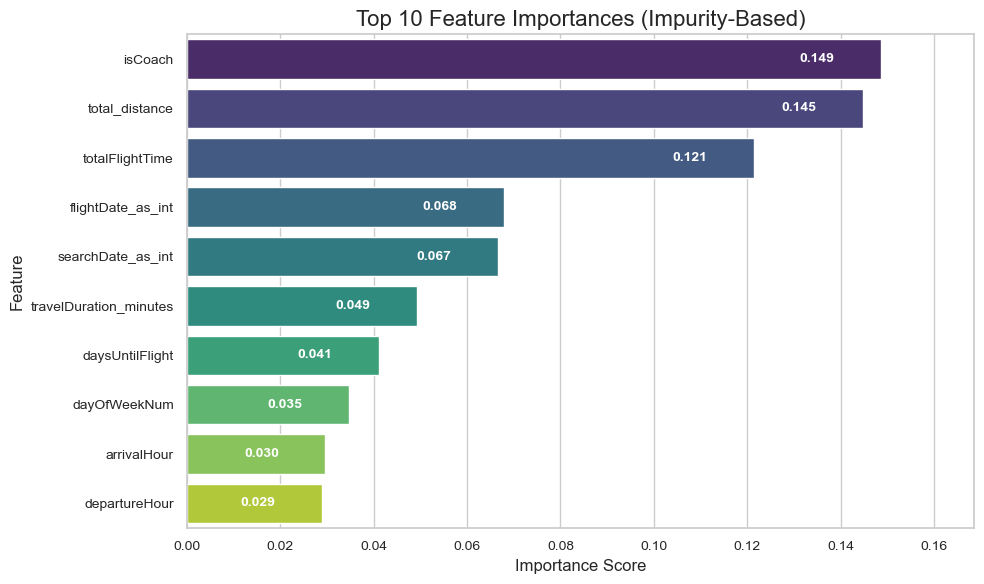

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create and sort DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df, 
    palette='viridis'
)

# Add labels inside the bars and adjust layout
for index, value in enumerate(importance_df['Importance']):
    ax.text(value - 0.01, index, f'{value:.3f}', 
            va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# Expand x-axis to prevent overlap with edges
max_val = importance_df['Importance'].max()
plt.xlim(0, max_val + 0.02)

# Styling
plt.title('Top 10 Feature Importances (Impurity-Based)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("feature_importances_top10_pretty_fixed.png", dpi=300)
plt.show()
